Лабораторная работа №1
Основные понятия математической статистики. Вариационный ряд. Эмпирическая функция распределения.
Вариант 10. Y = ln(x); a = 1; b = 5; y0 = 1

Задание 1. Сформировать выборку случайных величин Y_i=φ(x_i), где X_i - равномерно распределенной число из интервала [a, b]

Импортируем необходимые библиотеки:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline


In [4]:
n = 50 #задается вручную
a = 1.
b = 5.
y0 = 1.

Формируем n равномерно распределенных чисел ξi из интервала [0, 1]. Следом за этим преобразовываем ξi в число X_i, имеющее равномерное распределение из требуемого интервала по формуле X_i = ξi(b - a) + a. Потом по известному правилу φ(x) последовательно формируем выборку Y.

In [5]:
sample_X = []
sample_Y = []
uniform_rv = sts.uniform()
sample_xi = uniform_rv.rvs(size=n)

for i in range(n):
    x = sample_xi[i] * (b - a) + a
    sample_X.append(x)
    y = np.log(x)
    sample_Y.append(y)

Получили выборку Y:

In [6]:
print(sample_Y)

[0.9725982983953868, 0.5220315043260848, 0.37940447427038393, 1.5365736169740878, 1.5695041987578109, 1.032054669793587, 1.1158656455241653, 0.3205224089314322, 0.964003345637541, 0.5815006399643675, 0.8591004176905084, 1.5349743917944627, 0.10933612160348313, 0.4452255262294449, 1.496193944586082, 1.3271078363594748, 0.8695154236048942, 1.4675454489776587, 0.5961712574006236, 1.573976991660428, 0.1705821123723996, 1.3135090719884615, 0.7095055302054113, 0.11192928920505378, 1.2962490517493213, 0.4624567971919725, 1.2692391109865389, 0.8406372766976276, 0.12995051624882353, 0.7106937069644829, 1.5538023119109274, 0.0074305065602495255, 0.7217895759718339, 1.4154779699421294, 1.3834058480822335, 1.4797243689343678, 1.1840291701978347, 0.4037648451937023, 0.875177051860098, 0.8524165637644923, 1.2425279201735862, 1.5441758774276177, 1.0086553592814393, 1.3954162494046096, 0.5365740334124756, 1.3568370634346008, 0.10115476390041879, 1.0663521014365533, 1.3691753344055322, 1.58083062939300

Задание 2. Для полученной случайной величины построить вариационный ряд, эмпирическую функцию распределения СВ Y. Результаты представить в виде таблицы и графика.

In [7]:
ordered_Y = sorted(sample_Y)
d = {"Значение": ordered_Y}
df = pd.DataFrame(data=d)
print("Вариационный ряд:")
df.T

Вариационный ряд:


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Значение,0.007431,0.101155,0.109336,0.111929,0.129951,0.170582,0.320522,0.379404,0.403765,0.445226,...,1.467545,1.479724,1.496194,1.534974,1.536574,1.544176,1.553802,1.569504,1.573977,1.580831


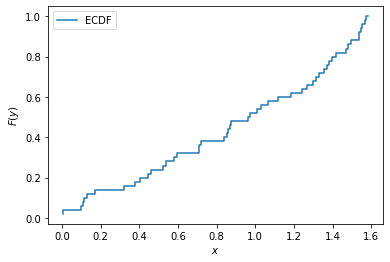

In [8]:
    
# для построения ECDF (эмпирическая функция распределения) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample_Y)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')    

Задание 3. Найти теоретически функцию распределения СВ Y. Результаты представить в аналитическом виде и в виде графика.

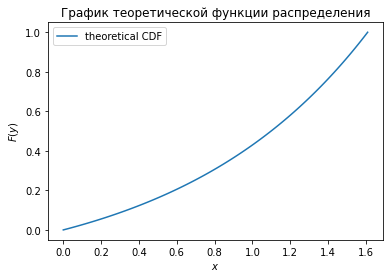

In [9]:
xx = np.linspace(np.log(1), np.log(5), 100)
yy = (np.exp(xx) - 1) / 4
plt.title("График теоретической функции распределения")
plt.plot(xx, yy, label='theoretical CDF')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

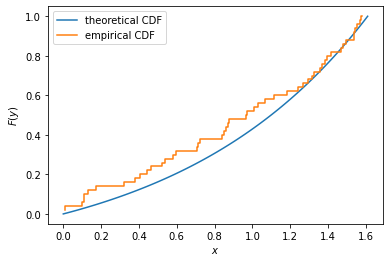

In [10]:
plt.plot(xx, yy, label='theoretical CDF')
plt.step(ecdf.x, ecdf.y, label='empirical CDF')
plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')